In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,Normalizer,StandardScaler
import warnings
warnings.filterwarnings("ignore")
import scipy as sp


In [2]:
data=pd.read_csv("predictive_maintenance.csv")

In [3]:
print("No of  Datapoints: {} \nNo. of Features(including Target class): {}".format(data.shape[0],data.shape[1]))

No of  Datapoints: 124494 
No. of Features(including Target class): 12


In [4]:
data.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [5]:
#checking the Dataframe
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
#checking for Null values
data.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [7]:
#checking features information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
data['date'].value_counts()

1/1/15      1163
1/3/15      1163
1/2/15      1163
1/4/15      1162
1/5/15      1161
            ... 
10/31/15      31
10/30/15      31
10/29/15      31
10/27/15      31
11/2/15       31
Name: date, Length: 304, dtype: int64

In [9]:
data['device'].value_counts()

S1F0FP0C    304
Z1F0GB8A    304
W1F0JXDL    304
S1F0GGPP    304
Z1F0QL3N    304
           ... 
Z1F0LT4K      5
W1F0LYBN      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64

In [10]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [11]:
#some features looks skewed
data.skew()

failure    34.227194
metric1    -0.011143
metric2    23.857923
metric3    82.712278
metric4    41.502611
metric5     3.483679
metric6    -0.375285
metric7    73.476456
metric8    73.476456
metric9    49.899278
dtype: float64

In [12]:
# Looks like metric7 and metric8 are has same features,if so we will have to drop one of them to avoid Multicollinearity
data['metric7'].equals(data['metric8'])

True

In [13]:
#checking for imbalance
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [14]:
(data['failure'].value_counts()/(data['failure'].value_counts().sum()))*100

0    99.914855
1     0.085145
Name: failure, dtype: float64

We can see that Dataset is Highly Imbalanced

### Conclusions:
<table>
    <header><th><tr><td> Sr No. </td><td> Observation </td><td>Observed</td> <td>Action</td></tr></th></header>
    <tr><td> 1. </td><td> No. of DataPoints </td><td>124494</td> <td>-</td></tr>
    <tr><td> 2. </td><td> No. of Features</td><td>11</td> <td>-</td></tr>
    <tr><td> 3. </td><td> Target Variable </td><td>failure</td> <td>-</td></tr>
    <tr><td> 4. </td><td> No. of NULLs </td><td>0</td> <td>No action Required</td></tr>
    <tr><td> 5. </td><td> Class Imbalance </td><td>High</td> <td>0.085/99.915 use proper weights/scale</td></tr>
    <tr><td> 6. </td><td> metric7 and metric8 </td><td>Identical</td> <td>Drop one</td></tr>
    <tr><td> 7. </td><td> Skewness</td><td>metric2,metric3,metric4,metric5,metric7,metric8,metric9 </td> <td>Log/Box-cox Transform or Use Non-Parametric Techniques</td></tr>
     
    

</table>

In [17]:
z = np.abs(sp.stats.zscore(data['metric2']))
print(z)

[0.04747772 0.07316993 0.07316993 ... 2.14370079 0.07316993 0.07316993]


## EDA

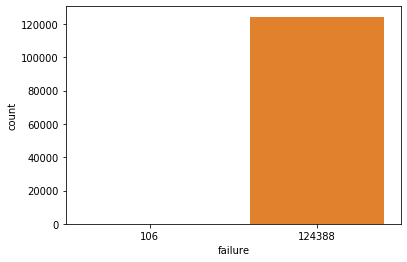

In [18]:
sns.countplot(data['failure'],data=data['failure'].value_counts())

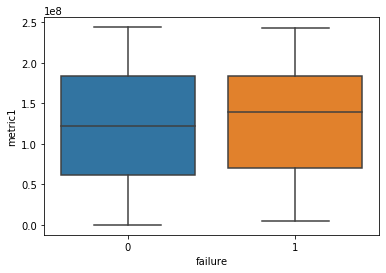

In [19]:
sns.boxplot(x='failure',y='metric1',data=data)

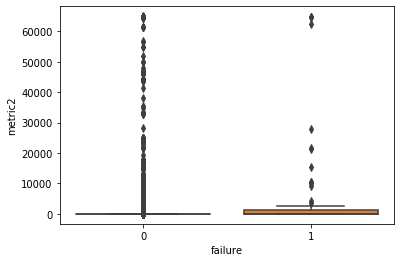

In [20]:
sns.boxplot(x='failure',y='metric2',data=data)

In [21]:
data[data['metric2']>30000]['failure'].value_counts()

0    176
1      4
Name: failure, dtype: int64

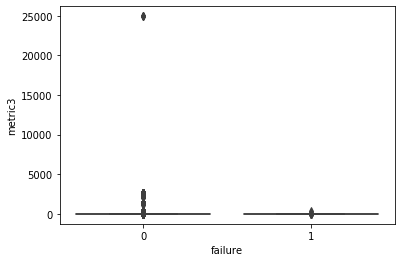

In [22]:
sns.boxplot(x='failure',y='metric3',data=data)

In [23]:
data[data['metric3']>2693]['failure'].value_counts()

0    4
Name: failure, dtype: int64

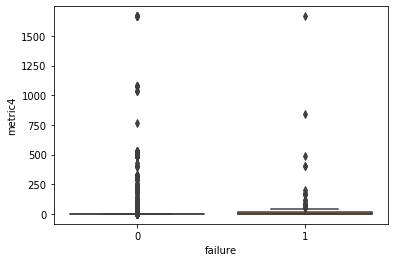

In [24]:
sns.boxplot(x='failure',y='metric4',data=data)

In [25]:
data[data['metric4']>215]['failure'].value_counts()

0    95
1     5
Name: failure, dtype: int64

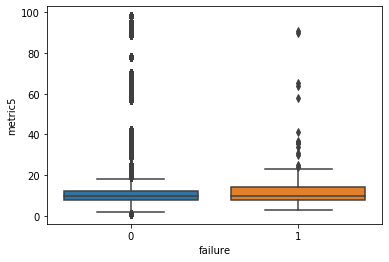

In [26]:
sns.boxplot(x='failure',y='metric5',data=data)

In [27]:
data[data['metric5']>93]['failure'].value_counts()

0    1120
Name: failure, dtype: int64

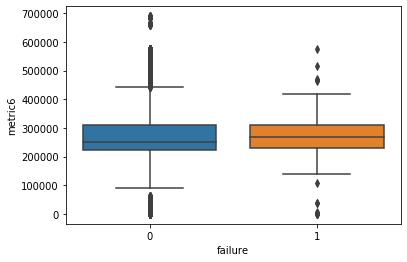

In [28]:
sns.boxplot(x='failure',y='metric6',data=data)

In [29]:
data[data['metric6']>574800]['failure'].value_counts()

0    31
Name: failure, dtype: int64

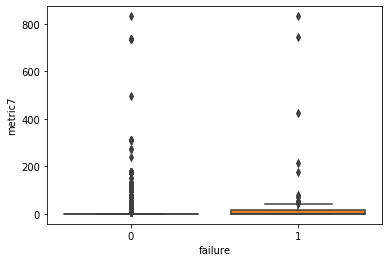

In [30]:
sns.boxplot(x='failure',y='metric7',data=data)

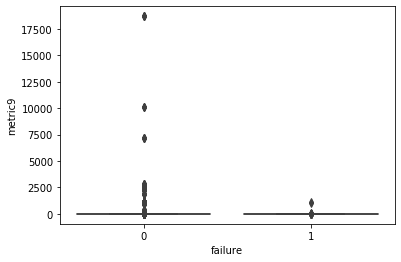

In [31]:
sns.boxplot(x='failure',y='metric9',data=data)

In [32]:
data[data['metric9']>5000]['failure'].value_counts()

0    14
Name: failure, dtype: int64

In [33]:
data_an=pd.DataFrame.copy(data)

In [34]:
#drop metric8 as its duplicate
#thresholds to remove outliers
#metric3-2693
#metric5 >93
#metric6>574800
#metric9 >5000
data_an.drop('metric8',axis=1,inplace=True)

In [35]:
data_an.drop(data_an[data_an['metric3']>2693].index,inplace=True)


In [36]:
data_an.drop(data_an[data_an['metric5']>93].index,inplace=True)

In [37]:
data_an.drop(data_an[data_an['metric6']>574800].index,inplace=True)

In [38]:
data_an.drop(data_an[data_an['metric9']>5000].index,inplace=True)

In [39]:
data_an['failure'].value_counts()

0    123223
1       106
Name: failure, dtype: int64

## Feature Engineering and Preprocessing

In [210]:
data_fe=pd.DataFrame.copy(data_an)

In [211]:
#Converting Date to pandas datetime
data_fe['date']= pd.to_datetime(data_fe['date'],errors="coerce")

In [212]:
#Extracting features from date
data_fe['year'] = data_fe['date'].dt.year
data_fe['month'] = data_fe['date'].dt.month
data_fe['week'] = data_fe['date'].dt.week
data_fe['day'] = data_fe['date'].dt.day
data_fe['dayofweek'] = data_fe['date'].dt.dayofweek

In [213]:
pd.crosstab(data_fe['dayofweek'],columns=data_fe['failure'])

failure,0,1
dayofweek,,
0,17692,27
1,17355,18
2,16956,15
3,17951,22
4,17861,12
5,17721,8
6,17687,4


In [214]:
pd.crosstab(data_fe['month'],columns=data_fe['failure'])

failure,0,1
month,,
1,24832,24
2,19346,14
3,19669,9
4,11853,9
5,11130,21
6,10313,6
7,10360,16
8,8282,4
9,4470,0


In [215]:
pd.crosstab(data_fe['week'],columns=data_fe['failure'])

failure,0,1
week,,
1,4615,0
2,5992,3
3,5046,4
4,4939,12
5,4947,5
6,4942,6
7,4945,3
8,4751,3
9,4668,2


In [216]:
data_fe.groupby('device').count()['failure']

device
S1F01085      6
S1F0166B      6
S1F01E6Y     48
S1F01JE0      6
S1F01R2B    223
           ... 
Z1F1VMZB    292
Z1F1VQFY    125
Z1F26YZB     84
Z1F282ZV     84
Z1F2PBHX     83
Name: failure, Length: 1156, dtype: int64

In [217]:
data_fe.groupby('device')['metric5'].transform('sum')

0           36
1           36
2          576
3           36
4         3869
          ... 
124489    2442
124490    2746
124491    2746
124492    3050
124493    2442
Name: metric5, Length: 123329, dtype: int64

In [218]:
data_fe[data_fe['device']=='S1F0RRB1']['metric1']

235      5230888
1398    13307628
2561    26258330
3724    37985862
4885    48467332
Name: metric1, dtype: int64

In [221]:
data_fe['m1_cumsum']=data_fe.groupby('device')['metric1'].cumsum()
data_fe['m2_cumsum']=data_fe.groupby('device')['metric2'].cumsum()
data_fe['m3_cumsum']=data_fe.groupby('device')['metric3'].cumsum()
data_fe['m4_cumsum']=data_fe.groupby('device')['metric4'].cumsum()
data_fe['m5_cumsum']=data_fe.groupby('device')['metric5'].cumsum()
data_fe['m6_cumsum']=data_fe.groupby('device')['metric6'].cumsum()
data_fe['m7_cumsum']=data_fe.groupby('device')['metric7'].cumsum()
data_fe['m9_cumsum']=data_fe.groupby('device')['metric9'].cumsum()


In [222]:
#device seems to have some series and further subseries...featurizing it
data_fe['device_series']=data_fe['device'].str[:4]

In [223]:
data_fe['device_series'].value_counts()

S1F0    32917
W1F0    22839
S1F1    21689
W1F1    19974
Z1F0    18421
Z1F1     7238
Z1F2      251
Name: device_series, dtype: int64

In [224]:
pd.crosstab(data_fe['device_series'],columns=data_fe['failure'])

failure,0,1
device_series,,
S1F0,32881,36
S1F1,21683,6
W1F0,22812,27
W1F1,19959,15
Z1F0,18408,13
Z1F1,7229,9
Z1F2,251,0


In [225]:
#234579
data_fe['metric2']=data_fe['metric2'].apply(lambda x:np.log(x+1))
data_fe['metric3']=data_fe['metric3'].apply(lambda x:np.log(x+1))
data_fe['metric4']=data_fe['metric4'].apply(lambda x:np.log(x+1))
data_fe['metric5']=data_fe['metric5'].apply(lambda x:np.log(x+1))
data_fe['metric7']=data_fe['metric7'].apply(lambda x:np.log(x+1))
data_fe['metric9']=data_fe['metric9'].apply(lambda x:np.log(x+1))

In [226]:
#dropping unwanted or featurized columns and one hot encoding device_series
data_after_fe=pd.concat([data_fe.drop(['date','device','year','device_series'], axis=1), pd.get_dummies(data_fe['device_series'])], axis=1)
data_after_fe

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,...,m6_cumsum,m7_cumsum,m9_cumsum,S1F0,S1F1,W1F0,W1F1,Z1F0,Z1F1,Z1F2
0,0,215630672,4.043051,0.000000,3.970292,1.945910,407438,0.000000,2.079442,1,...,407438,0,7,1,0,0,0,0,0,0
1,0,61370680,0.000000,1.386294,0.000000,1.945910,403174,0.000000,0.000000,1,...,403174,0,0,1,0,0,0,0,0,0
2,0,173295968,0.000000,0.000000,0.000000,2.564949,237394,0.000000,0.000000,1,...,237394,0,0,1,0,0,0,0,0,0
3,0,79694024,0.000000,0.000000,0.000000,1.945910,410186,0.000000,0.000000,1,...,410186,0,0,1,0,0,0,0,0,0
4,0,135970480,0.000000,0.000000,0.000000,2.772589,313173,0.000000,1.386294,1,...,313173,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0.000000,0.000000,0.000000,2.397895,353705,2.197225,0.000000,11,...,81801608,8,0,0,0,0,0,1,0,0
124490,0,172556680,4.574711,4.682131,1.609438,2.484907,332792,0.000000,2.639057,11,...,76558137,0,3014,0,0,0,0,1,0,0
124491,0,19029120,8.483223,0.000000,0.000000,2.484907,350410,0.000000,0.000000,11,...,81699748,0,0,0,0,0,0,1,0,0
124492,0,226953408,0.000000,0.000000,0.000000,2.564949,358980,0.000000,0.000000,11,...,82642274,0,0,0,0,0,0,1,0,0


## Train test split

In [227]:
y=data_after_fe['failure'].values

In [228]:
X=data_after_fe.drop(['failure'],axis=1)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [230]:
X_train.shape

(82630, 27)

In [231]:
X_test.shape

(40699, 27)

## Making dataset Ready - Normalising

In [232]:
#metric 1 Normalisation
s1=Normalizer()
train=s1.fit_transform(X_train['metric1'].values.reshape(1,-1))
X_train['metric1']=train.reshape(-1,1)

test=s1.transform(X_test['metric1'].values.reshape(1,-1))
X_test['metric1']=test.reshape(-1,1)


In [233]:
#metric 2 Normalisation
s2=Normalizer()
train=s2.fit_transform(X_train['metric2'].values.reshape(1,-1))
X_train['metric2']=train.reshape(-1,1)

test=s2.transform(X_test['metric2'].values.reshape(1,-1))
X_test['metric2']=test.reshape(-1,1)


In [234]:
#metric 3 Normalisation
s3=Normalizer()
train=s3.fit_transform(X_train['metric3'].values.reshape(1,-1))
X_train['metric3']=train.reshape(-1,1)

test=s3.transform(X_test['metric3'].values.reshape(1,-1))
X_test['metric3']=test.reshape(-1,1)



In [235]:
#metric 4 Normalisation
s4=Normalizer()
train=s4.fit_transform(X_train['metric4'].values.reshape(1,-1))
X_train['metric4']=train.reshape(-1,1)

test=s4.transform(X_test['metric4'].values.reshape(1,-1))
X_test['metric4']=test.reshape(-1,1)

In [236]:
#metric 5 Normalisation
s5=Normalizer()
train=s5.fit_transform(X_train['metric5'].values.reshape(1,-1))
X_train['metric5']=train.reshape(-1,1)

test=s5.transform(X_test['metric5'].values.reshape(1,-1))
X_test['metric5']=test.reshape(-1,1)

In [237]:
#metric 6 Normalisation
s6=Normalizer()
train=s6.fit_transform(X_train['metric6'].values.reshape(1,-1))
X_train['metric6']=train.reshape(-1,1)

test=s6.transform(X_test['metric6'].values.reshape(1,-1))
X_test['metric6']=test.reshape(-1,1)

In [238]:
#metric 7 Normalisation
s7=Normalizer()
train=s7.fit_transform(X_train['metric7'].values.reshape(1,-1))
X_train['metric7']=train.reshape(-1,1)

test=s7.transform(X_test['metric7'].values.reshape(1,-1))
X_test['metric7']=test.reshape(-1,1)

In [239]:
#metric 9 Normalisation
s9=Normalizer()
train=s9.fit_transform(X_train['metric9'].values.reshape(1,-1))
X_train['metric9']=train.reshape(-1,1)

test=s9.transform(X_test['metric9'].values.reshape(1,-1))
X_test['metric9']=test.reshape(-1,1)

In [240]:
X_train

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,week,...,m6_cumsum,m7_cumsum,m9_cumsum,S1F0,S1F1,W1F0,W1F1,Z1F0,Z1F1,Z1F2
53458,0.003262,0.000000,0.0000,0.000000,0.003635,2.802523e-03,0.0,0.000000,3,11,...,16071355,0,0,1,0,0,0,0,0,0
95619,0.005264,0.000000,0.0000,0.000000,0.003423,2.958438e-03,0.0,0.000000,6,26,...,38517600,0,0,0,0,0,1,0,0,0
7088,0.004683,0.000000,0.0000,0.000000,0.003027,4.838893e-03,0.0,0.000000,1,2,...,2714690,0,0,1,0,0,0,0,0,0
102185,0.003789,0.008158,0.0098,0.029591,0.001910,4.276732e-03,0.0,0.002341,7,28,...,65448371,0,193,0,0,0,1,0,0,0
117973,0.004780,0.000000,0.0000,0.000000,0.003533,2.757642e-03,0.0,0.002341,9,37,...,53526994,0,250,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11177,0.001614,0.000000,0.0000,0.000000,0.002864,2.333341e-03,0.0,0.002341,1,3,...,2244096,0,12,0,0,1,0,0,0,0
34764,0.001329,0.005126,0.0000,0.000000,0.003303,3.618396e-07,0.0,0.000000,2,7,...,1305,0,0,0,0,0,1,0,0,0
3428,0.005645,0.000000,0.0000,0.000000,0.003027,1.955244e-03,0.0,0.000000,1,1,...,468120,0,0,0,0,0,0,0,1,0
66208,0.001506,0.000000,0.0000,0.000000,0.005663,2.969667e-03,0.0,0.000000,4,14,...,22177141,0,0,0,0,0,0,1,0,0


## Modeliing

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,f1_score,confusion_matrix,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Logistic regression

In [242]:
lr=LogisticRegression(class_weight='balanced')

In [243]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [244]:
y_pred=lr.predict(X_test)

In [245]:
accuracy_score(y_test,y_pred)

0.9991400280105163

In [246]:
confusion_matrix(y_test,y_pred)

array([[40664,     0],
       [   35,     0]], dtype=int64)

In [247]:
f1_score(y_test,y_pred)

0.0

In [190]:
lr.coef_

array([[ 1.01809158e-24,  5.23998893e-23, -1.05565959e-24,
         6.50722782e-23,  1.51468957e-24,  9.64453238e-25,
         1.21027186e-22,  6.30820196e-24, -3.00716977e-23,
         1.77975430e-21,  8.47531874e-21, -8.35948330e-21,
        -2.55467920e-12,  9.56360039e-17, -5.73809592e-18,
         1.74292791e-18, -2.02827546e-19, -9.68187704e-15,
         1.41109411e-18,  1.31281126e-17,  1.10766601e-21,
        -1.10615969e-21,  5.90435851e-22, -2.67910936e-22,
        -4.01039611e-22,  2.24280360e-22, -1.64214142e-23]])

In [191]:
X_train.columns

Index(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric7', 'metric9', 'month', 'week', 'day', 'dayofweek', 'm1_cumsum',
       'm2_cumsum', 'm3_cumsum', 'm4_cumsum', 'm5_cumsum', 'm6_cumsum',
       'm7_cumsum', 'm9_cumsum', 'S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0',
       'Z1F1', 'Z1F2'],
      dtype='object')

### Naive Bayes

In [192]:
mnb=MultinomialNB(class_prior=[0.9992,0.0008])

In [193]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=[0.9992, 0.0008], fit_prior=True)

In [194]:
preds=mnb.predict(X_test)

In [195]:
accuracy_score(y_test,preds)

0.4736971424359321

In [196]:
confusion_matrix(y_test,preds)

array([[19256, 21408],
       [   12,    23]], dtype=int64)

In [197]:
f1_score(y_test,preds)

0.0021429236932824

### Decision Tree Classifier

In [198]:
dt=DecisionTreeClassifier(class_weight='balanced')

In [199]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [200]:
dt_preds=dt.predict(X_test)

In [201]:
accuracy_score(y_test,dt_preds)

0.9818668763360279

In [202]:
confusion_matrix(y_test,dt_preds)

array([[39960,   704],
       [   34,     1]], dtype=int64)

In [203]:
f1_score(y_test,dt_preds)

0.002702702702702703


### RandomForestClassifier

In [254]:
param_dist = {"n_estimators":sp.stats.randint(50,300),
              "max_depth": sp.stats.randint(6,24),
              "min_samples_split": sp.stats.randint(110,190),
              "min_samples_leaf": sp.stats.randint(25,65)}

clf = RandomForestClassifier(class_weight='balanced',random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=5,cv=10,scoring='f1',return_train_score=True,random_state=25,verbose=2)

rf_random.fit(X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   7.0s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   4.5s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 
[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   5.0s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 
[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   4.1s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 
[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   4.6s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 
[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   4.7s
[CV] max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111 
[CV]  max_depth=10, min_samples_leaf=51, min_samples_split=125, n_estimators=111, total=   4.3s
[CV] max_depth=10, 

[CV]  max_depth=7, min_samples_leaf=47, min_samples_split=141, n_estimators=98, total=   3.4s
[CV] max_depth=7, min_samples_leaf=47, min_samples_split=141, n_estimators=98 
[CV]  max_depth=7, min_samples_leaf=47, min_samples_split=141, n_estimators=98, total=   3.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
        

In [255]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.09927685 0.10593896 0.10718831 0.09610304 0.0651672 ]
mean train scores [0.28342062 0.39304509 0.32092503 0.24653041 0.14511937]


In [256]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=149,
                       min_weight_fraction_leaf=0.0, n_estimators=53, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [257]:
rfc=rf_random.best_estimator_

In [258]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=149,
                       min_weight_fraction_leaf=0.0, n_estimators=53, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [259]:
rfc_preds=rfc.predict(X_test)

In [260]:
accuracy_score(y_test,rfc_preds)

0.9931447947124008

In [261]:
confusion_matrix(y_test,rfc_preds)

array([[40410,   254],
       [   25,    10]], dtype=int64)

In [262]:
f1_score(y_test,rfc_preds)

0.06688963210702341

### KNN

In [95]:
knn=KNeighborsClassifier(n_neighbors=50)

In [96]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [97]:
knn_preds=knn.predict(X_test)

In [98]:
accuracy_score(y_test,knn_preds)

0.9991400280105163

In [99]:
confusion_matrix(y_test,knn_preds)

array([[40664,     0],
       [   35,     0]], dtype=int64)

In [100]:
f1_score(y_test,knn_preds)

0.0

### XGBoost

In [264]:
param_dist = {"n_estimators":sp.stats.randint(30,170),
              "max_depth": sp.stats.randint(10,47)}

clf = XGBClassifier(scale_pos_weight=0.998)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=5,cv=10,scoring='f1',return_train_score=True,random_state=25,verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] max_depth=14, n_estimators=92 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=14, n_estimators=92, total=  59.3s
[CV] max_depth=14, n_estimators=92 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] .................... max_depth=14, n_estimators=92, total= 1.7min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 1.7min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 1.9min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 2.1min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 2.1min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 2.0min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .................... max_depth=14, n_estimators=92, total= 2.2min
[CV] max_depth=14, n_estimators=92 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 155.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [265]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.998, seed=None,
              silent=None, subsample=1, verbosity=1)

In [266]:
xgb=xgb_random.best_estimator_

In [267]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.998, seed=None,
              silent=None, subsample=1, verbosity=1)

In [268]:
xgb_preds=xgb.predict(X_test)

In [269]:
accuracy_score(y_test,xgb_preds)

0.9986731860733679

In [270]:
confusion_matrix(y_test,xgb_preds)

array([[40641,    23],
       [   31,     4]], dtype=int64)

In [271]:
f1_score(y_test,xgb_preds)

0.12903225806451613

In [108]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
preds_y_svm = svm_model.predict(X_test)



NameError: name 'metrics' is not defined

In [112]:
print("F1 score: %f" % f1_score(y_test, np.round(preds_y_svm)))
print("ROC AUC score: %f" % roc_auc_score(y_test, preds_y_svm))
print(confusion_matrix(y_test, np.round(preds_y_svm)))

F1 score: 0.000000
ROC AUC score: 0.500000
[[40664     0]
 [   35     0]]


In [116]:
X_train.shape

(82630, 19)

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, AlphaDropout

def prepare_dnn_binary_classifier(input_dim, 
                                  num_layers, 
                                  diminish_factor, 
                                  use_dropout=False, 
                                  dropout_factor=0.3, 
                                  optimizer = "adam"):
    model = Sequential()
    model.add(Dense(input_dim, 
                    input_dim=input_dim, 
                    activation="selu", 
                    kernel_initializer='lecun_normal'))

    if use_dropout:
            model.add(AlphaDropout(dropout_factor))

    carried_size = input_dim

    for layer in range(num_layers - 1):
        carried_size = int(max(carried_size / diminish_factor, 1))
        model.add(Dense(carried_size, 
                        activation="selu", 
                        kernel_initializer='lecun_normal'))

        if use_dropout:
            model.add(AlphaDropout(dropout_factor))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    return model

In [275]:
model = prepare_dnn_binary_classifier(27, 1, 2, use_dropout=False)
model.fit(X_train, 
          y_train, 
          epochs=5, 
          validation_data=[X_test, y_test])

preds_y = model.predict(X_test)

print("F1 score: %f" % f1_score(y_test, np.round(preds_y)))
print("ROC AUC score: %f" % roc_auc_score(y_test, preds_y))
print(confusion_matrix(y_test, np.round(preds_y)))

Train on 82630 samples, validate on 40699 samples
Epoch 1/5
82630/82630 [==============================] - 72s 866us/sample - loss: 413242.0339 - acc: 0.9980 - val_loss: 283443.4782 - val_acc: 0.9991
Epoch 2/5
82630/82630 [==============================] - 61s 735us/sample - loss: 537469.2312 - acc: 0.9980 - val_loss: 747655.3279 - val_acc: 0.9991
Epoch 3/5
82630/82630 [==============================] - 73s 888us/sample - loss: 492597.7047 - acc: 0.9980 - val_loss: 846928.0885 - val_acc: 0.9991
Epoch 4/5
82630/82630 [==============================] - 68s 826us/sample - loss: 549033.7407 - acc: 0.9983 - val_loss: 746997.6737 - val_acc: 0.9991
Epoch 5/5
82630/82630 [==============================] - 70s 842us/sample - loss: 455607.4416 - acc: 0.9980 - val_loss: 1010245.2214 - val_acc: 0.9991
F1 score: 0.000000
ROC AUC score: 0.500000
[[40664     0]
 [   35     0]]
